# Summative Assessment - Data Analytics and Visualization

This assessment will cover the following:
- Importing the data and dealing with missing values
- Exploring the data and producing some simple visualizations
- Sampling and comparing samples
- Looking for correlation
- Using regression to predict power consumption

It's split into tasks, each in its own section. Write your code and answers in the spaces provided. Feel free to add cells and import any libraries you'll require.

## The data

The data we'll be using in this assesssment was downloaded from data.world (https://data.world/databeats/household-power-consumption), a subset of a larger dataset available from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption#).

It may look familiar to some of you!

Here's the description of the data from the site:

<b>Data Set Information</b>

This household electricity consumption dataset contains 260,640 measurements gathered between January 2007 and June 2007 (6 months). It is a subset of a larger, original archive that contains 2,075,259 measurements gathered between December 2006 and November 2010 (47 months).

<b>Attribute Information</b>

date: Date in format dd/mm/yyyy
time: time in format hh:mm:ss
global_active_power: household global minute-averaged active power (in kilowatt)
global_reactive_power: household global minute-averaged reactive power (in kilowatt)
voltage: minute-averaged voltage (in volt)
global_intensity: household global minute-averaged current intensity (in ampere)
sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

## Assessment Flow

## Task 1 - Getting the data!

The data has been downloaded for you

In [6]:
file_path = 'household_power_consumption-household_power_consumption.csv'

It is comma separated, but has a major issue you'll have to deal with before you can begin working with it: missing values are marked with a '?'. You'll need to remove all rows with missing values and make sure the columns are the right type before we move on. This is a classic example of a problem whose solution isn't worth memorizing, so if you're struggling take a look around on stack overflow or elsewhere for others who've solved the same problem!

In [ ]:
# Import the libraries you'll be using and load the data into a pandas dataframe here

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import calendar
import random as rnd
from matplotlib import pyplot as plt
import scipy.stats as stats
from scipy import stats
from scipy.stats import pearsonr
from sklearn import linear_model

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('household_power_consumption-household_power_consumption.csv', sep=',',
                names = ['Date','Time','Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3'],
                low_memory=False, encoding='iso8859_15')
df.shape

(260641, 9)

Now, we can start looking at this data. Assuming you've called your dataframe 'df', run df.head() and df.describe() to see what we're working with. Remember, at this stage you shouldn't have missing data.

In [4]:
# Look at the data you've loaded

In [5]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0
2,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0
3,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0
4,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0


In [6]:
df.drop([0,1], axis=0).head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0
3,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0
4,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0
5,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0
6,1/1/07,0:05:00,2.55,0.1,241.83,10.4,0,0,0
7,1/1/07,0:06:00,2.534,0.096,241.07,10.4,0,0,0
8,1/1/07,0:07:00,2.484,0,241.29,10.2,0,0,0
9,1/1/07,0:08:00,2.468,0,241.23,10.2,0,0,0
10,1/1/07,0:09:00,2.486,0,242.18,10.2,0,0,0
11,1/1/07,0:10:00,2.492,0,242.46,10.2,0,0,0


In [7]:
df.dtypes

Date                     object
Time                     object
Global_active_power      object
Global_reactive_power    object
Voltage                  object
Global_intensity         object
Sub_metering_1           object
Sub_metering_2           object
Sub_metering_3           object
dtype: object

In [8]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], infer_datetime_format=True, errors='coerce')
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce').fillna(0).astype(float)
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce').fillna(0).astype(float)
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce').fillna(0).astype(float)
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce').fillna(0).astype(float)
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce').fillna(0).astype(float)
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce').fillna(0).astype(float)
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'], errors='coerce').fillna(0).astype(float)                

In [9]:
#df.index = df['Datetime']
# It's nice seeing day of the week as a word - so I'll add that as a column
#import calendar
#df['Day_name'] = [calendar.day_name[x] for x in df.Datetime.dt.dayofweek]

In [10]:
df.dtypes

Date                     datetime64[ns]
Time                     datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object

In [11]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,NaT,NaT,0.000,0.000,0.00,0.0,0.0,0.0,0.0
1,2007-01-01,2018-04-02 00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0
2,2007-01-01,2018-04-02 00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0
3,2007-01-01,2018-04-02 00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0
4,2007-01-01,2018-04-02 00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0


Struggled to get the Date column and Time column to merge / join. When I applied the datetime conversion it took the PC local Date. I also tried to convert this but with on luck. So I carried on with the PC's data but luckily the time was still the same.

In [12]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,260641.000000,260641.000000,260641.000000,260641.000000,260641.000000,260641.000000,260641.000000
mean,1.148078,0.121938,235.747145,4.902761,1.313197,1.646433,5.747427
std,1.181469,0.112038,28.789622,4.998618,6.658178,6.586224,8.157042
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.292000,0.000000,236.500000,1.200000,0.000000,0.000000,0.000000
50%,0.534000,0.104000,239.540000,2.400000,0.000000,0.000000,0.000000
75%,1.590000,0.192000,241.780000,6.800000,0.000000,1.000000,17.000000
max,10.670000,1.148000,250.890000,46.400000,78.000000,78.000000,20.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260641 entries, 0 to 260640
Data columns (total 9 columns):
Date                     260640 non-null datetime64[ns]
Time                     260640 non-null datetime64[ns]
Global_active_power      260641 non-null float64
Global_reactive_power    260641 non-null float64
Voltage                  260641 non-null float64
Global_intensity         260641 non-null float64
Sub_metering_1           260641 non-null float64
Sub_metering_2           260641 non-null float64
Sub_metering_3           260641 non-null float64
dtypes: datetime64[ns](2), float64(7)
memory usage: 17.9 MB


In [14]:
sum(df.isnull().values.ravel())
df.dropna(how='all').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260641 entries, 0 to 260640
Data columns (total 9 columns):
Date                     260640 non-null datetime64[ns]
Time                     260640 non-null datetime64[ns]
Global_active_power      260641 non-null float64
Global_reactive_power    260641 non-null float64
Voltage                  260641 non-null float64
Global_intensity         260641 non-null float64
Sub_metering_1           260641 non-null float64
Sub_metering_2           260641 non-null float64
Sub_metering_3           260641 non-null float64
dtypes: datetime64[ns](2), float64(7)
memory usage: 19.9 MB


In [264]:
sum([True for idx,row in df.iterrows() if any(row.isnull())])

1

Look at the count field - lots of rows! Try running something like df.plot() - it takes a while. Imagine a dataset with 25 million rows. If we're going to be exploring and playing around, we might not want to wait for things to complete. So, sampling! Your next task will be to generate a smaller dataset for data exploration

## Task 2: Subsampling

Create two new dataframes, one with the first 1000 rows of df and another with 1000 rows starting from 75,000. 

In [266]:
# Answer here

In [15]:
df1 = df.iloc[0:1000].sample(1000)
df1.head()  

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
321,2007-01-01,2018-04-02 05:20:00,2.496,0.124,242.81,10.2,0.0,2.0,0.0
680,2007-01-01,2018-04-02 11:19:00,2.540,0.000,238.43,10.6,0.0,0.0,0.0
75,2007-01-01,2018-04-02 01:14:00,2.566,0.128,241.49,10.6,0.0,0.0,0.0
148,2007-01-01,2018-04-02 02:27:00,2.584,0.132,242.45,10.6,0.0,0.0,0.0
230,2007-01-01,2018-04-02 03:49:00,2.448,0.000,243.18,10.0,0.0,0.0,0.0


In [16]:
df2 = df.iloc[75000:76000].sample(1000)
df2.tail()  

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
75084,2007-02-22,2018-04-02 03:23:00,2.256,0.052,238.78,9.4,0.0,0.0,0.0
75988,2007-02-22,2018-04-02 18:27:00,1.386,0.208,237.17,5.8,0.0,0.0,0.0
75837,2007-02-22,2018-04-02 15:56:00,0.394,0.090,243.31,1.6,0.0,0.0,0.0
75903,2007-02-22,2018-04-02 17:02:00,0.732,0.116,243.37,3.0,0.0,0.0,0.0
75096,2007-02-22,2018-04-02 03:35:00,2.442,0.178,240.65,10.0,0.0,2.0,0.0


Do you think the first 1000 rows will give a good picture of the whole dataset? Find the mean and std dev for both of your small datasets. Do they match? Do they reflect the statistics for the dataset as a whole? Write your answers to these questions in a cell below the code you use to create and investigate these new dataframes.

In [17]:
# Answer here - explain your code and reasoning with extra cells for explanation.

In [18]:
df1.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
mean,2.383372,0.101682,240.179260,9.869000,0.0,0.246000,3.143000
std,0.578047,0.091696,7.864252,2.362334,0.0,0.545694,6.722927
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,2.420000,0.000000,238.790000,9.800000,0.0,0.000000,0.000000
50%,2.512000,0.114000,240.555000,10.400000,0.0,0.000000,0.000000
75%,2.602000,0.138000,241.902500,10.800000,0.0,0.000000,0.000000
max,3.558000,0.454000,245.070000,14.600000,0.0,2.000000,19.000000


In [19]:
df2.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
mean,1.817010,0.086088,239.827460,7.572600,0.0,0.249000,6.926000
std,1.172552,0.074981,2.083603,4.927707,0.0,0.552543,8.534833
min,0.252000,0.000000,233.840000,1.000000,0.0,0.000000,0.000000
25%,0.719000,0.046000,238.480000,3.000000,0.0,0.000000,0.000000
50%,1.560000,0.078000,239.755000,6.400000,0.0,0.000000,0.000000
75%,2.384000,0.114000,241.402500,9.800000,0.0,0.000000,17.000000
max,8.244000,0.356000,244.970000,35.000000,0.0,2.000000,18.000000


### Answer to: If df1 = df2 in size

No, they don’t match on either the mean nor on the standard deviation. I looked at the dataset and the numerical value's captured be each meter are different (some meters recorded a large value and others nothing) and this would influence the mean and standard deviation totals.

Create one new dataframewith the first 10,000 rows of data. Use random sampling to create a dataframe with 10,000 rows taken randomly from within the data and name it df_small. Is this a better representation of the dataset as a whole? If so, we can move on. If not, add more data or make other changes you feel are necessary.

In [20]:
# Answer

In [21]:
df3 = df.iloc[0:10000].sample(10000)
df1.head() 

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
321,2007-01-01,2018-04-02 05:20:00,2.496,0.124,242.81,10.2,0.0,2.0,0.0
680,2007-01-01,2018-04-02 11:19:00,2.540,0.000,238.43,10.6,0.0,0.0,0.0
75,2007-01-01,2018-04-02 01:14:00,2.566,0.128,241.49,10.6,0.0,0.0,0.0
148,2007-01-01,2018-04-02 02:27:00,2.584,0.132,242.45,10.6,0.0,0.0,0.0
230,2007-01-01,2018-04-02 03:49:00,2.448,0.000,243.18,10.0,0.0,0.0,0.0


In [22]:
n = 10000           #take 10,000 random samples from the overall df
df_small = df.take(np.random.permutation(len(df))[:n])
df_small.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
59044,2007-11-02,2018-04-02 00:03:00,2.008,0.108,242.94,9.2,0.0,2.0,0.0
239579,2007-06-16,2018-04-02 08:58:00,1.276,0.082,238.93,5.2,0.0,0.0,17.0
183934,2007-08-05,2018-04-02 17:33:00,0.754,0.154,235.85,3.2,0.0,2.0,0.0
96285,2007-08-03,2018-04-02 20:44:00,4.578,0.080,233.35,19.6,0.0,35.0,17.0
26541,2007-01-19,2018-04-02 10:20:00,1.396,0.198,235.97,5.8,0.0,0.0,17.0


In [23]:
df3.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.483504,0.133779,240.882279,6.260500,0.585700,1.752500,5.273100
std,1.194184,0.112438,4.126551,5.004711,4.424049,7.661091,8.025282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.394000,0.048000,238.640000,1.800000,0.000000,0.000000,0.000000
50%,1.371000,0.134000,241.110000,5.800000,0.000000,0.000000,0.000000
75%,2.378000,0.188000,243.210000,9.800000,0.000000,0.000000,17.000000
max,8.044000,0.862000,250.020000,35.600000,39.000000,75.000000,19.000000


In [24]:
df_small.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.167844,0.122818,235.698438,4.989380,1.372900,1.695500,5.758500
std,1.204588,0.111709,28.813009,5.098699,6.856905,6.664054,8.162429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.294000,0.000000,236.470000,1.200000,0.000000,0.000000,0.000000
50%,0.558000,0.104000,239.480000,2.600000,0.000000,0.000000,0.000000
75%,1.622000,0.196000,241.780000,6.800000,0.000000,1.000000,17.000000
max,9.254000,0.946000,249.260000,41.200000,75.000000,74.000000,19.000000


### Answer to: If df3 = df_small in size
Yes comparing these two pandas the mean and standard deviation look much closer to each other. I used df_small from here on out.

## Task 3: Correlation and Plotting

Explore the correlation of various features in the graph. Plot some scatterplots showing the features with the highest correlation coeficient, and some for those with the lowest correlation coeficient. 

- Name two pairs of highly correlated variables. 
- Produce at least three scatter plots.

### Answer:

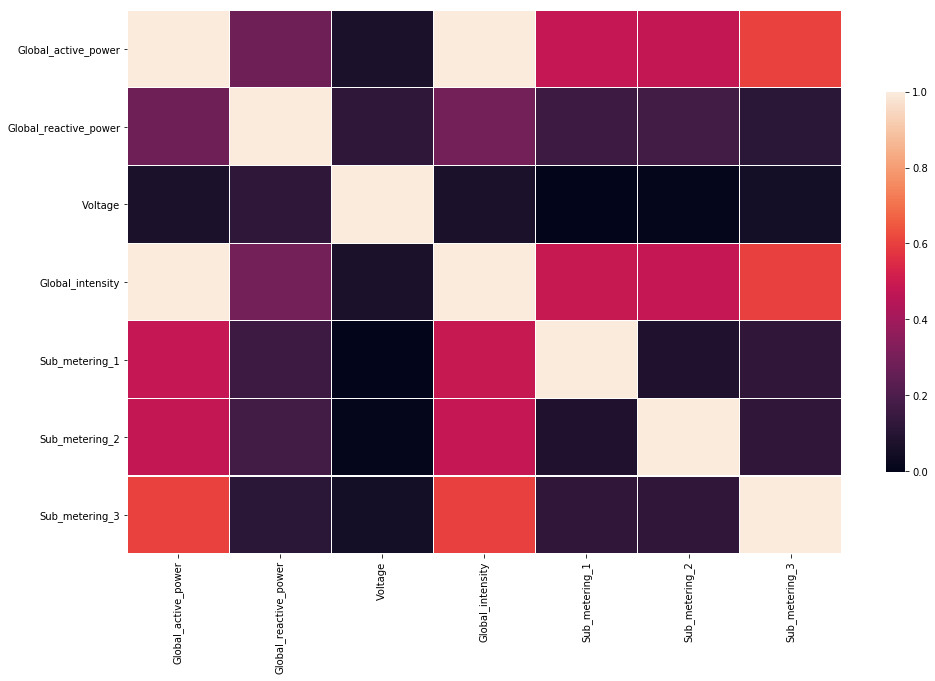

In [25]:
corr = df_small.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr, xticklabels=corr.columns.values, 
            yticklabels=corr.columns.values, linewidths=.08,                   
            cbar_kws={"shrink": .7})  

### First Correlation - Global active power vs. Sub metering 2 - High Correlation 1

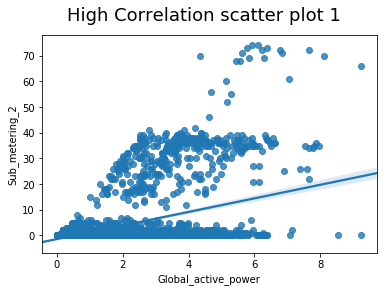

In [57]:
fig = sns.regplot(df_small['Global_active_power'], df_small['Sub_metering_2'])
fig.figure.suptitle("High Correlation scatter plot 1", fontsize = 18)
plt.xlabel('Global_active_power', fontsize=10)
plt.ylabel('Sub_metering_2', fontsize=10)
plt.show(fig)

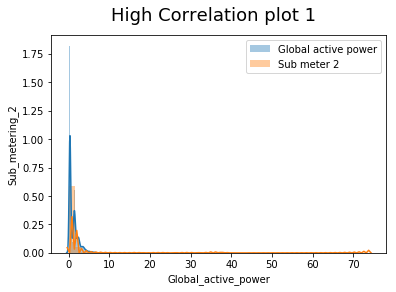

In [55]:
fig = sns.distplot(df_small['Global_active_power'], label="Global active power")
fig = sns.distplot(df_small['Sub_metering_2'], label="Sub meter 2")
fig.figure.suptitle("High Correlation plot 1", fontsize = 18)
plt.xlabel('Global_active_power', fontsize=10)
plt.ylabel('Sub_metering_2', fontsize=10)
plt.legend()
plt.show(fig)

In [28]:
r,p = stats.pearsonr(df_small['Global_active_power'], df_small['Sub_metering_2'])
print('r', r)
print('p', p)

r 0.4766806930110053
p 0.0


#### Insight into Correlation - High 1
Looking at the two graphs I can see a nice overlap and spread of the two data values. Looking at the high r-value (0.482) indicates that 'Sub meter 2' does add to the overall energy draw on 'Global active power' meter / house. It could be that the large home appliance’s are connected to this sub meter.

### Second Correlation - Global active power vs. Sub metering 3 - High Correlation 2

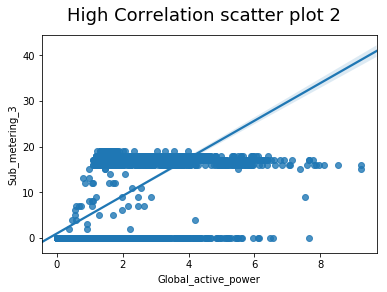

In [29]:
fig = sns.regplot(df_small['Global_active_power'], df_small['Sub_metering_3'])
fig.figure.suptitle("High Correlation scatter plot 2", fontsize = 18)
plt.xlabel('Global_active_power', fontsize=10)
plt.ylabel('Sub_metering_3', fontsize=10)
plt.show(fig)

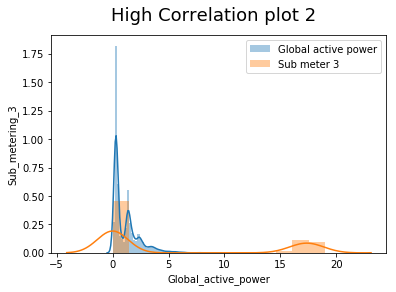

In [52]:
fig = sns.distplot(df_small['Global_active_power'], label="Global active power")
fig = sns.distplot(df_small['Sub_metering_3'], label="Sub meter 3")
fig.figure.suptitle("High Correlation plot 2", fontsize = 18)
plt.xlabel('Global_active_power', fontsize=10)
plt.ylabel('Sub_metering_3', fontsize=10)
plt.legend()
plt.show(fig)

In [31]:
r,p = stats.pearsonr(df_small['Global_active_power'], df_small['Sub_metering_3'])
print('r', r)
print('p', p)

r 0.6072856109122382
p 0.0


#### Insight into Correlation - High 2
Looking at the two graphs I can see a higher overlap and spread of the two data values compared to 'High Correlation 1'. Looking at the high r-value (0.611) indicates that 'Sub meter 3' draws more energy compared to submeter 2 which adds to the overall energy draw on 'Global active power' meter / house. It could be that the large/more home appliance’s are connected to this sub meter. Or this could be that this circuit gets used more or longer.

### Third Correlation - Voltage vs. Sub metering 2 - Low Correlation

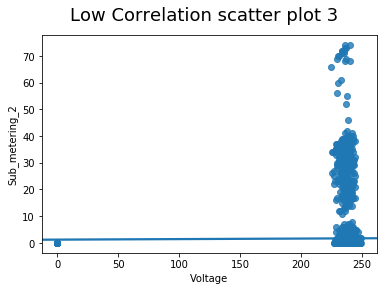

In [32]:
fig = sns.regplot(df_small['Voltage'], df_small['Sub_metering_2'])
fig.figure.suptitle("Low Correlation scatter plot 3", fontsize = 18)
plt.xlabel('Voltage', fontsize=10)
plt.ylabel('Sub_metering_2', fontsize=10)
plt.show(fig)

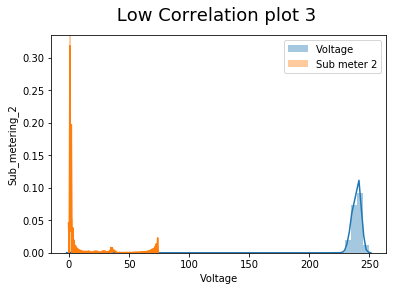

In [54]:
fig = sns.distplot(df_small['Voltage'], label="Voltage")
fig = sns.distplot(df_small['Sub_metering_2'], label="Sub meter 2")
fig.figure.suptitle(" Low Correlation plot 3", fontsize = 18)
plt.xlabel('Voltage', fontsize=10)
plt.ylabel('Sub_metering_2', fontsize=10)
plt.legend()
plt.show(fig)

In [34]:
r,p = stats.pearsonr(df_small['Voltage'], df_small['Sub_metering_2'])
print('r', r)
print('p', p)

r 0.008618057771686682
p 0.38884489441024106


#### Insight into Correlation - Low
Looking at the two graphs I can see a little overlap and spread of the two data values. Looking at the high r-value (0.008) indicates that 'Sub meter 2' does not add to the overall voltage draw on 'Voltage' meter. This could indicate that the home appliance’s are well balanced and do not cause a shift in phase's.

## Task 4: Simple Linear Regression

Find the parameters of a simple linear model with Global_intensity as the explanatory variable and Global_active_power as the dependent variable

- Print out the model parameters and score

### Answer:

In [ ]:
# Build a simple model and find parameters, as well as the R-Squared Value

Intercept:    -0.009716440796653458
Coefficient:  [0.23601342]


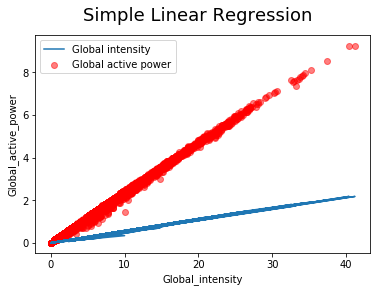

In [60]:
# Initialize the model, and name it lr1
lr1 = linear_model.LinearRegression()

#input data is in the right format for the explanatory variable
INPUT = np.array(df_small['Global_intensity']).reshape(-1, 1)

# Fit the data
lr1.fit(X = INPUT,y = df_small['Global_active_power'])

# Print intercept and coefficient
print("Intercept:   ",lr1.intercept_)
print("Coefficient: ",lr1.coef_)

# Plot the data and the prediction
plt.scatter(df_small['Global_intensity'], df_small['Global_active_power'],  c="r", alpha=0.5, label="Global active power")
# Line of best fit. NB, doing this manually based on the parameters
plt.plot(df_small['Global_intensity'], [lr1.coef_*x +lr1.intercept_ for x in df_small['Global_active_power']], label="Global intensity") # We could also use lr1.predict(x), as in next example
plt.suptitle("Simple Linear Regression", fontsize = 18)
plt.xlabel("Global_intensity", fontsize=10)
plt.ylabel("Global_active_power", fontsize=10)
plt.legend()

In [64]:
# First, a simple linear regression model (one input var)
INPUT = np.array(df_small['Global_intensity']).reshape(-1, 1)
slr = linear_model.LinearRegression()
slr.fit(X = INPUT,y = df_small['Global_active_power'])
print("Score with simple linear model: ", slr.score(INPUT, df_small['Global_active_power']))

# Now the multiple regression model we developed above - two input vars
INPUT = np.array(df_small['Global_intensity']).reshape(-1, 1)
mlr = linear_model.LinearRegression()
mlr.fit(X = INPUT,y = df_small['Global_active_power'])
print("Score with second input:        ",mlr.score(INPUT, df_small['Global_active_power']))

Score with simple linear model:  0.9979642541769457
Score with second input:         0.9979642541769457


In [74]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_small['Global_intensity'], df_small['Global_active_power'])
print("r-squared:", r_value**2)

r-squared: 0.9979642541769445


#### Answer
From the two Linear regression models we get:
- Model Parameters :
Intercept:   -0.0097
; Coefficient: 0.2360
- Score of : 0.99796
- r-squared:  0.99796

As we can see that the two do not follow the same path and deviate indicating that we are introducing harmonics to the power grid.

## Task 5: Regression, but harder this time

You didn't think it was going to be that easy? Intensity and power are different measures of essentially the same thing. We want to predict power from the other readings - a much harder task.

Tasks: 
- Predict the power based on as many of the other factors as you think necessary. As before, print out model parameters and the score, both when using the model on your sample and when running it (i.e. score()) over the whole dataset.

### Answer:

In [79]:
df_small['Sub_Sum'] = df_small[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].sum(axis=1)
df_small.head()

C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_Sum
59044,2007-11-02,2018-04-02 00:03:00,2.008,0.108,242.94,9.2,0.0,2.0,0.0,2.0
239579,2007-06-16,2018-04-02 08:58:00,1.276,0.082,238.93,5.2,0.0,0.0,17.0,17.0
183934,2007-08-05,2018-04-02 17:33:00,0.754,0.154,235.85,3.2,0.0,2.0,0.0,2.0
96285,2007-08-03,2018-04-02 20:44:00,4.578,0.080,233.35,19.6,0.0,35.0,17.0,52.0
26541,2007-01-19,2018-04-02 10:20:00,1.396,0.198,235.97,5.8,0.0,0.0,17.0,17.0


In [82]:
#df_small.loc['Sub_Sum'] = df_small.loc['Sub_Sum'] / 1000 * 1 / 3600

#tried to convert the sum of all the submeters watt-hours to the same standard unit of Global active power kilowatt

Intercept:    -2.269384590585579
Coefficient:  [9.50151107]


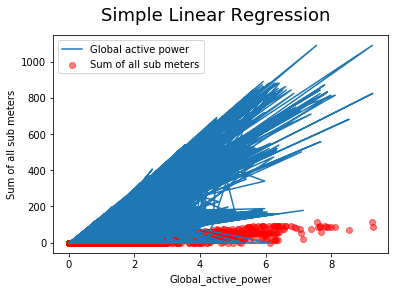

In [83]:
# Initialize the model, and name it lr1
lr1 = linear_model.LinearRegression()

#input data is in the right format for the explanatory variable
INPUT = np.array(df_small['Global_active_power']).reshape(-1, 1)

# Fit the data
lr1.fit(X = INPUT,y = df_small['Sub_Sum'])

# Print intercept and coefficient
print("Intercept:   ",lr1.intercept_)
print("Coefficient: ",lr1.coef_)

# Plot the data and the prediction
plt.scatter(df_small['Global_active_power'], df_small['Sub_Sum'],  c="r", alpha=0.5, label="Sum of all sub meters")
# Line of best fit. NB, doing this manually based on the parameters
plt.plot(df_small['Global_active_power'], [lr1.coef_*x +lr1.intercept_ for x in df_small['Sub_Sum']], label="Global active power") # We could also use lr1.predict(x), as in next example
plt.suptitle("Simple Linear Regression", fontsize = 18)
plt.xlabel("Global_active_power", fontsize=10)
plt.ylabel("Sum of all sub meters", fontsize=10)
plt.legend()

In [84]:
# First, a simple linear regression model (one input var)
INPUT = np.array(df_small['Global_active_power']).reshape(-1, 1)
slr = linear_model.LinearRegression()
slr.fit(X = INPUT,y = df_small['Sub_Sum'])
print("Score with simple linear model: ", slr.score(INPUT, df_small['Sub_Sum']))

# Now the multiple regression model we developed above - two input vars
INPUT = np.array(df_small['Global_active_power']).reshape(-1, 1)
mlr = linear_model.LinearRegression()
mlr.fit(X = INPUT,y = df_small['Sub_Sum'])
print("Score with second input:        ",mlr.score(INPUT, df_small['Sub_Sum']))

Score with simple linear model:  0.6775271580758144
Score with second input:         0.6775271580758144


In [85]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_small['Global_active_power'], df_small['Sub_Sum'])
print("r-squared:", r_value**2)

r-squared: 0.6775271580758145


#### Answer
From the two Linear regression models we get:
- Model Parameters :
Intercept:   -2.2694
; Coefficient: 9.5015
- Score of : 0.67753
- r-squared:  0.67753

My prediction is unfortunately not as accurate as I would like it to be (I think this is because I was not able to convert the units correctly). What I was expecting to see was that the sum of all the sub meters would create a model / a prediction as the what the global meter would read.

## Task 6 - Logistic Regression

Use logistic regression to predict occasions when Sub_metering_1 is greater than Sub_metering_2 - in other words, when is the kitchen more in use then the laundry room? 
Tasks: 
- Add a column with a 1 when kitchen power is higher than laundry room (sub_metering_1>2) and a 0 when not. 
- Build a logistic regression model with this as the dependant variable. Use any variables as inputs.
- How did your model score? Briefly comment with your thoughts. Do you think this is something one could feasibly predict from the available data?

## Task 7 - Visualizations and conclusions

Well done! You're almost through. Now for some final easy points, pick three of the following questions and create a visualization and some text to answer the question:
- What time of day is the kitchen used?
- Does the weekly power consumption remain constant?
- Which sub-metering zone used the most power?
- How did power use in the different zones change over time?
- How did the two small subsamples you created in the beginning (1000 rows each) differ?